In [77]:
# import dependencies
from path import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from sklearn.svm import SVR,SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from datetime import timedelta,datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# imports for database connection
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func

# import these to view table column headers & rows
from sqlalchemy.orm import sessionmaker
from sqlalchemy import select

import time

%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.options.display.max_columns = None

In [78]:
engine = create_engine("sqlite:///../Resources/covid_db.db")

In [79]:
# reflect an existing database into a new model (creates base class for automap schema)
Base = automap_base()

In [80]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [81]:
Base.classes.keys()

['covid_stats', 'government_regulation']

In [82]:
# save references to each table
covid_stats = Base.classes.covid_stats
government_regulation = Base.classes.government_regulation

In [83]:
# Create session (link) from Python to the database
session = sessionmaker(bind=engine)()

In [84]:
# View table column headers & rows - covid_stats
covid_stats_table = select('*').select_from(covid_stats)
covid_stats_result = session.execute(covid_stats_table).fetchall()
# print(covid_stats.__table__.columns.keys())
# print(covid_stats_result)

In [85]:
# View table column headers & rows - government_regulation
government_regulation_table = select('*').select_from(government_regulation)
government_regulation_result = session.execute(government_regulation_table).fetchall()
# print(government_regulation.__table__.columns.keys())
# print(government_regulation_result)

In [86]:
# Merge covid_stats_table with government regulation_table
joined = session.query(covid_stats.primary_key_reaction,\
                        covid_stats.date_updated,\
                        covid_stats.iso_code,\
                        covid_stats.continent,\
                        covid_stats.location,\
                        covid_stats.population,\
                        covid_stats.population_density,\
                        covid_stats.median_age,\
                        covid_stats.new_cases,\
                        covid_stats.percentage_of_Pop_New_Cases,\
                        covid_stats.new_deaths,\
                        covid_stats.percentage_of_Pop_New_Deaths,\
                        covid_stats.new_tests,\
                        covid_stats.percentage_of_Pop_New_Tests,\
                        covid_stats.total_cases_updated,\
                        covid_stats.percentage_of_Pop_Total_Cases,\
                        covid_stats.total_deaths_updated,\
                        covid_stats.percentage_of_Pop_Total_Deaths,\
                        covid_stats.total_tests_updated,\
                        covid_stats.percentage_of_Pop_Total_Tests,\
                       government_regulation.primary_key_response,\
                       government_regulation.StringencyIndex_updated,\
                       government_regulation.percentage_change_stringency,\
                       government_regulation.StringencyLegacyIndex_updated,\
                       government_regulation.GovernmentResponseIndex_updated,\
                       government_regulation.percentage_change_GovernmentResponse,\
                       government_regulation.ContainmentHealthIndex_updated,\
                       government_regulation.percentage_change_ContainmentHealth,\
                       government_regulation.EconomicSupportIndex_updated,\
                       government_regulation.percentage_change_EconomicSupport)\
        .join(government_regulation,government_regulation.primary_key_response == covid_stats.primary_key_reaction)

# save the query results as a Pandas DataFrame and set the index
df = pd.DataFrame(joined, columns=['primary_key_reaction',
                                             'date_updated',
                                             'iso_code',
                                             'continent',
                                             'location',
                                             'population',
                                             'population_density',
                                             'median_age',
                                             'new_cases',
                                             'percentage_of_Pop_New_Cases',
                                             'new_deaths',
                                             'percentage_of_Pop_New_Deaths',
                                             'new_tests',
                                             'percentage_of_Pop_New_Tests',
                                             'total_cases_updated',
                                             'percentage_of_Pop_Total_Cases',
                                             'total_deaths_updated',
                                             'percentage_of_Pop_Total_Deaths',
                                             'total_tests_updated',
                                             'percentage_of_Pop_Total_Tests',
                                             'primary_key_response',
                                             'StringencyIndex_updated',
                                             'percentage_change_stringency',
                                             'StringencyLegacyIndex_updated',
                                             'GovernmentResponseIndex_updated',
                                             'percentage_change_GovernmentResponse',
                                             'ContainmentHealthIndex_updated',
                                             'percentage_change_ContainmentHealth',
                                             'EconomicSupportIndex_updated',
                                             'percentage_change_EconomicSupport'
                                             ])

In [87]:
# preview 
df

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,percentage_of_Pop_Total_Cases,total_deaths_updated,percentage_of_Pop_Total_Deaths,total_tests_updated,percentage_of_Pop_Total_Tests,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
0,ABW2020-03-13,2020-03-13,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,0,0.000000e+00,0,0.000000,2,0.001873,0,0.000000,0,0.000000,ABW2020-03-13,0.00,0.000000,0.00,2.56,0.000000,3.03,0.000000,0.0,0.0
1,ABW2020-03-19,2020-03-19,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,0,0.000000e+00,0,0.000000,2,0.001873,0,0.000000,0,0.000000,ABW2020-03-19,33.33,0.000000,42.86,29.49,15.015601,34.85,15.016502,0.0,0.0
2,ABW2020-03-20,2020-03-20,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,0,0.000000e+00,0,0.000000,4,0.003747,0,0.000000,0,0.000000,ABW2020-03-20,33.33,0.000000,42.86,29.49,0.000000,34.85,0.000000,0.0,0.0
3,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,0,0.000000e+00,0,0.000000,4,0.003747,0,0.000000,0,0.000000,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0
4,ABW2020-03-22,2020-03-22,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,0,0.000000e+00,0,0.000000,4,0.003747,0,0.000000,0,0.000000,ABW2020-03-22,44.44,0.000000,60.71,37.18,0.000000,43.94,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32272,ZWE2020-08-27,2020-08-27,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,55,0.000370,13,8.746595e-07,951,0.006398,6251,0.042058,179,0.001204,95721,0.644025,ZWE2020-08-27,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32273,ZWE2020-08-28,2020-08-28,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,41,0.000276,10,6.728150e-07,1551,0.010435,6292,0.042334,189,0.001272,97272,0.654461,ZWE2020-08-28,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32274,ZWE2020-08-29,2020-08-29,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,96,0.000646,6,4.036890e-07,0,0.000000,6388,0.042979,195,0.001312,97272,0.654461,ZWE2020-08-29,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32275,ZWE2020-08-30,2020-08-30,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,18,0.000121,1,6.728150e-08,0,0.000000,6406,0.043101,196,0.001319,97272,0.654461,ZWE2020-08-30,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0


In [88]:
df.columns

Index(['primary_key_reaction', 'date_updated', 'iso_code', 'continent',
       'location', 'population', 'population_density', 'median_age',
       'new_cases', 'percentage_of_Pop_New_Cases', 'new_deaths',
       'percentage_of_Pop_New_Deaths', 'new_tests',
       'percentage_of_Pop_New_Tests', 'total_cases_updated',
       'percentage_of_Pop_Total_Cases', 'total_deaths_updated',
       'percentage_of_Pop_Total_Deaths', 'total_tests_updated',
       'percentage_of_Pop_Total_Tests', 'primary_key_response',
       'StringencyIndex_updated', 'percentage_change_stringency',
       'StringencyLegacyIndex_updated', 'GovernmentResponseIndex_updated',
       'percentage_change_GovernmentResponse',
       'ContainmentHealthIndex_updated', 'percentage_change_ContainmentHealth',
       'EconomicSupportIndex_updated', 'percentage_change_EconomicSupport'],
      dtype='object')

In [89]:
days = []

for day in future:
    cum_df = pd.DataFrame()
    for code in iso_codes:
        cum_df = cum_df.append(iso_dicts[code][day])
    days.append(cum_df.reset_index(drop=True)) 
    
len(days)

4

final_df = df
final_df.drop(columns=["total_cases_updated","total_deaths_updated"],inplace=True)
final_df.columns

In [90]:
for i in range(len(days)):
    days[i].drop(columns=['total_deaths_updated','total_cases_updated'],inplace=True)

In [91]:
final_df = df
for i in range(len(days)):
    suffix_right = "_" + str(i * 15 + 30)
    
    final_df = final_df.merge(days[i],on=["date_updated","iso_code"],how="left",suffixes=["",suffix_right]) # 
    
final_df

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,percentage_of_Pop_Total_Cases,total_deaths_updated,percentage_of_Pop_Total_Deaths,total_tests_updated,percentage_of_Pop_Total_Tests,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport,date_updated_30,date_updated_30,total_cases_updated_30,total_deaths_updated_30,date_updated_45,date_updated_45,total_cases_updated_45,total_deaths_updated_45,date_updated_60,date_updated_60,total_cases_updated_60,total_deaths_updated_60,date_updated_75,date_updated_75,total_cases_updated_75,total_deaths_updated_75
0,ABW2020-03-13,2020-03-13,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,0,0.000000e+00,0,0.000000,2,0.001873,0,0.000000,0,0.000000,ABW2020-03-13,0.00,0.000000,0.00,2.56,0.000000,3.03,0.000000,0.0,0.0,2020-04-12,2020-04-12,92.0,0.0,2020-04-27,2020-04-27,100.0,2.0,2020-05-12,2020-05-12,101.0,3.0,2020-05-27,2020-05-27,101.0,3.0
1,ABW2020-03-19,2020-03-19,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,0,0.000000e+00,0,0.000000,2,0.001873,0,0.000000,0,0.000000,ABW2020-03-19,33.33,0.000000,42.86,29.49,15.015601,34.85,15.016502,0.0,0.0,2020-04-18,2020-04-18,96.0,2.0,2020-05-03,2020-05-03,100.0,2.0,2020-05-18,2020-05-18,101.0,3.0,2020-06-02,2020-06-02,101.0,3.0
2,ABW2020-03-20,2020-03-20,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,0,0.000000e+00,0,0.000000,4,0.003747,0,0.000000,0,0.000000,ABW2020-03-20,33.33,0.000000,42.86,29.49,0.000000,34.85,0.000000,0.0,0.0,2020-04-19,2020-04-19,96.0,2.0,2020-05-04,2020-05-04,100.0,2.0,2020-05-19,2020-05-19,101.0,3.0,2020-06-03,2020-06-03,101.0,3.0
3,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,0,0.000000e+00,0,0.000000,4,0.003747,0,0.000000,0,0.000000,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0,2020-04-20,2020-04-20,97.0,2.0,2020-05-05,2020-05-05,100.0,2.0,2020-05-20,2020-05-20,101.0,3.0,2020-06-04,2020-06-04,101.0,3.0
4,ABW2020-03-22,2020-03-22,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,0,0.000000e+00,0,0.000000,4,0.003747,0,0.000000,0,0.000000,ABW2020-03-22,44.44,0.000000,60.71,37.18,0.000000,43.94,0.000000,0.0,0.0,2020-04-21,2020-04-21,97.0,2.0,2020-05-06,2020-05-06,100.0,2.0,2020-05-21,2020-05-21,101.0,3.0,2020-06-05,2020-06-05,101.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32272,ZWE2020-08-27,2020-08-27,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,55,0.000370,13,8.746595e-07,951,0.006398,6251,0.042058,179,0.001204,95721,0.644025,ZWE2020-08-27,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0,2020-09-26,NaN,NaN,NaN,2020-10-11,NaN,NaN,NaN,2020-10-26,NaN,NaN,NaN,2020-11-10,NaN,NaN,NaN
32273,ZWE2020-08-28,2020-08-28,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,41,0.000276,10,6.728150e-07,1551,0.010435,6292,0.042334,189,0.001272,97272,0.654461,ZWE2020-08-28,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0,2020-09-27,NaN,NaN,NaN,2020-10-12,NaN,NaN,NaN,2020-10-27,NaN,NaN,NaN,2020-11-11,NaN,NaN,NaN
32274,ZWE2020-08-29,2020-08-29,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,96,0.000646,6,4.036890e-07,0,0.000000,6388,0.042979,195,0.001312,97272,0.654461,ZWE2020-08-29,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0,2020-09-28,NaN,NaN,NaN,2020-10-13,NaN,NaN,NaN,2020-10-28,NaN,NaN,NaN,2020-11-12,NaN,NaN,NaN
32275,ZWE2020-08-30,2020-08-30,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,18,0.000121,1,6.728150e-08,0,0.000000,6406,0.043101,196,0.001319,97272,0.654461,ZW

In [92]:
final_df[final_df["iso_code"]=="CAN"]

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,percentage_of_Pop_Total_Cases,total_deaths_updated,percentage_of_Pop_Total_Deaths,total_tests_updated,percentage_of_Pop_Total_Tests,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport,date_updated_30,date_updated_30,total_cases_updated_30,total_deaths_updated_30,date_updated_45,date_updated_45,total_cases_updated_45,total_deaths_updated_45,date_updated_60,date_updated_60,total_cases_updated_60,total_deaths_updated_60,date_updated_75,date_updated_75,total_cases_updated_75,total_deaths_updated_75
5099,CAN2020-01-01,2020-01-01,CAN,North America,Canada,37742157,4.037,41.4,0,0.000000,0,0.000000e+00,0,0.000000,0,0.000000,0,0.000000,0,0.000000,CAN2020-01-01,0.00,0.000000,0.00,3.85,0.000000,4.55,0.000000,0.0,0.0,2020-01-31,2020-01-31,3.0,0.0,2020-02-15,2020-02-15,8.0,0.0,2020-03-01,2020-03-01,20.0,0.0,2020-03-16,2020-03-16,304.0,1.0
5100,CAN2020-01-02,2020-01-02,CAN,North America,Canada,37742157,4.037,41.4,0,0.000000,0,0.000000e+00,0,0.000000,0,0.000000,0,0.000000,0,0.000000,CAN2020-01-02,0.00,0.000000,0.00,3.85,0.000000,4.55,0.000000,0.0,0.0,2020-02-01,2020-02-01,4.0,0.0,2020-02-16,2020-02-16,8.0,0.0,2020-03-02,2020-03-02,24.0,0.0,2020-03-17,2020-03-17,424.0,4.0
5101,CAN2020-01-03,2020-01-03,CAN,North America,Canada,37742157,4.037,41.4,0,0.000000,0,0.000000e+00,0,0.000000,0,0.000000,0,0.000000,0,0.000000,CAN2020-01-03,0.00,0.000000,0.00,3.85,0.000000,4.55,0.000000,0.0,0.0,2020-02-02,2020-02-02,4.0,0.0,2020-02-17,2020-02-17,8.0,0.0,2020-03-03,2020-03-03,27.0,0.0,2020-03-18,2020-03-18,569.0,8.0
5102,CAN2020-01-04,2020-01-04,CAN,North America,Canada,37742157,4.037,41.4,0,0.000000,0,0.000000e+00,0,0.000000,0,0.000000,0,0.000000,0,0.000000,CAN2020-01-04,0.00,0.000000,0.00,3.85,0.000000,4.55,0.000000,0.0,0.0,2020-02-03,2020-02-03,4.0,0.0,2020-02-18,2020-02-18,8.0,0.0,2020-03-04,2020-03-04,30.0,0.0,2020-03-19,2020-03-19,690.0,9.0
5103,CAN2020-01-05,2020-01-05,CAN,North America,Canada,37742157,4.037,41.4,0,0.000000,0,0.000000e+00,0,0.000000,0,0.000000,0,0.000000,0,0.000000,CAN2020-01-05,0.00,0.000000,0.00,3.85,0.000000,4.55,0.000000,0.0,0.0,2020-02-04,2020-02-04,4.0,0.0,2020-02-19,2020-02-19,8.0,0.0,2020-03-05,2020-03-05,33.0,0.0,2020-03-20,2020-03-20,846.0,10.0
5104,CAN2020-01-06,2020-01-06,CAN,North America,Canada,37742157,4.037,41.4,0,0.000000,0,0.000000e+00,0,0.000000,0,0.000000,0,0.000000,0,0.000000,CAN2020-01-06,0.00,0.000000,0.00,3.85,0.000000,4.55,0.000000,0.0,0.0,2020-02-05,2020-02-05,5.0,0.0,2020-02-20,2020-02-20,8.0,0.0,2020-03-06,2020-03-06,45.0,0.0,2020-03-21,2020-03-21,971.0,12.0
5105,CAN2020-01-07,2020-01-07,CAN,North America,Canada,37742157,4.037,41.4,0,0.000000,0,0.000000e+00,0,0.000000,0,0.000000,0,0.000000,0,0.000000,CAN2020-01-07,0.00,0.000000,0.00,3.85,0.000000,4.55,0.000000,0.0,0.0,2020-02-06,2020-02-06,5.0,0.0,2020-02-21,2020-02-21,9.0,0.0,2020-03-07,2020-03-07,51.0,0.0,2020-03-22,2020-03-22,1302.0,18.0
5106,CAN2020-01-08,2020-01-08,CAN,North America,Canada,37742157,4.037,41.4,0,0.000000,0,0.000000e+00,0,0.000000,0,0.000000,0,0.000000,0,0.000000,CAN2020-01-08,0.00,0.000000,0.00,3.85,0.000000,4.55,0.000000,0.0,0.0,2020-02-07,2020-02-07,7.0,0.0,2020-02-22,2020-02-22,9.0,0.0,2020-03-08,2020-03-08,57.0,0.0,2020-03-23,2020-03-23,1430.0,20.0
5107,CAN2020-01-09,2020-01-09,CAN,North America,Canada,37742157,4.037,41.4,0,0.000000,0,0.000000e+00,0,0.000000,0,0.000000,0,0.000000,0,0.000000,CAN2020-01-09,0.00,0.000000,0.00,3.85,0.000000,4.55,0.000000,0.0,0.0,2020-02-08,2020-02-08,7.0,0.0,2020-02-23,2020-02-23,9.0,0.0,2020-03-09,2020-03-09,62.0,0.0,20

In [93]:
final_df.head()

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,percentage_of_Pop_Total_Cases,total_deaths_updated,percentage_of_Pop_Total_Deaths,total_tests_updated,percentage_of_Pop_Total_Tests,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport,date_updated_30,date_updated_30,total_cases_updated_30,total_deaths_updated_30,date_updated_45,date_updated_45,total_cases_updated_45,total_deaths_updated_45,date_updated_60,date_updated_60,total_cases_updated_60,total_deaths_updated_60,date_updated_75,date_updated_75,total_cases_updated_75,total_deaths_updated_75
0,ABW2020-03-13,2020-03-13,ABW,North America,Aruba,106766,584.8,41.2,2,0.001873,0,0.0,0,0.0,2,0.001873,0,0.0,0,0.0,ABW2020-03-13,0.00,0.000000,0.00,2.56,0.000000,3.03,0.000000,0.0,0.0,2020-04-12,2020-04-12,92.0,0.0,2020-04-27,2020-04-27,100.0,2.0,2020-05-12,2020-05-12,101.0,3.0,2020-05-27,2020-05-27,101.0,3.0
1,ABW2020-03-19,2020-03-19,ABW,North America,Aruba,106766,584.8,41.2,0,0.000000,0,0.0,0,0.0,2,0.001873,0,0.0,0,0.0,ABW2020-03-19,33.33,0.000000,42.86,29.49,15.015601,34.85,15.016502,0.0,0.0,2020-04-18,2020-04-18,96.0,2.0,2020-05-03,2020-05-03,100.0,2.0,2020-05-18,2020-05-18,101.0,3.0,2020-06-02,2020-06-02,101.0,3.0
2,ABW2020-03-20,2020-03-20,ABW,North America,Aruba,106766,584.8,41.2,2,0.001873,0,0.0,0,0.0,4,0.003747,0,0.0,0,0.0,ABW2020-03-20,33.33,0.000000,42.86,29.49,0.000000,34.85,0.000000,0.0,0.0,2020-04-19,2020-04-19,96.0,2.0,2020-05-04,2020-05-04,100.0,2.0,2020-05-19,2020-05-19,101.0,3.0,2020-06-03,2020-06-03,101.0,3.0
3,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766,584.8,41.2,0,0.000000,0,0.0,0,0.0,4,0.003747,0,0.0,0,0.0,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0,2020-04-20,2020-04-20,97.0,2.0,2020-05-05,2020-05-05,100.0,2.0,2020-05-20,2020-05-20,101.0,3.0,2020-06-04,2020-06-04,101.0,3.0
4,ABW2020-03-22,2020-03-22,ABW,North America,Aruba,106766,584.8,41.2,0,0.000000,0,0.0,0,0.0,4,0.003747,0,0.0,0,0.0,ABW2020-03-22,44.44,0.000000,60.71,37.18,0.000000,43.94,0.000000,0.0,0.0,2020-04-21,2020-04-21,97.0,2.0,2020-05-06,2020-05-06,100.0,2.0,2020-05-21,2020-05-21,101.0,3.0,2020-06-05,2020-06-05,101.0,3.0


## DF New Deaths

In [94]:
def nn_ml(period,X_train_scaled,y_train_scaled, X_test_scaled,y_test_scaled,**layers):
    
    nn = Sequential()
    n_layers = layers["n_layers"]
    
    for layer in range(n_layers):
        if layer == 0:
            number_input_features = layers["number_input_features"]
        number_hidden_nodes = layers["l"+str(layer)]["number_hidden_nodes"]
        activation = layers["l"+str(layer)]["activation_function"]
        nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation=activation))

    nn.summary()

    # compile model
    nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

    # train model
    model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=100)

    # Plot the train and test loss function
    plt.plot(model_1.history["loss"])
    plt.title(period + " Days - loss_function - 1 hidden layer")
    plt.legend(["loss"])
    plt.show()

    y_train_pred = nn.predict(X_train_scaled)
    y_test_pred = nn.predict(X_test_scaled)

    print(r2_score(y_train_scaled, y_train_pred))
    print(r2_score(y_test_scaled, y_test_pred))

In [96]:
def train_test(test_size,target,**layers):
    for n in ['30','45','60','75']:
        print(f"\n\n Training and predicting - {n} days ahead\n\n")

        total_deaths = "_".join(['total_deaths_updated',n])
        total_cases = "_".join(['total_cases_updated',n])
        df_n = final_df[['population', 'population_density', 'median_age', 'StringencyIndex_updated',\
                         "total_cases_updated", "total_deaths_updated", total_cases, total_deaths]]
        df_n.dropna(inplace=True)
        
        X_df = df_n.drop([total_cases,total_deaths],axis=1)
        print(f"X COLUMNS: {X_df.columns}")
        X = X_df.values
        
        if target == "deaths":
            y = df_n[total_deaths].values
        elif target == "cases":
            y = df_n[total_cases].values
            
        y = y.reshape(-1,1)

        # Split dataset into training and testing
        # train 95% of data, test 5%
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

        # scale data
        X_scaler = StandardScaler()
        X_scaler.fit(X_train)

        y_scaler= StandardScaler()
        y_scaler.fit(y_train)

        y_train_scaled=y_scaler.transform(y_train)
        y_test_scaled=y_scaler.transform(y_test)

        X_train_scaled = X_scaler.transform(X_train)
        X_test_scaled = X_scaler.transform(X_test)

        nn_ml(period = n, X_train_scaled = X_train_scaled, 
              y_train_scaled = y_train_scaled, 
              X_test_scaled = X_test_scaled, 
              y_test_scaled = y_test_scaled, 
              **layers)



 Training and predicting - 30 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
2
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_102 (Dense)            (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


813/813 [==============================] - 2s 3ms/step - loss: 0.0893 - mse: 0.0893
Epoch 2/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0556 - mse: 0.0556
Epoch 3/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0477 - mse: 0.0477
Epoch 4/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0434 - mse: 0.0434
Epoch 5/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0406 - mse: 0.0406
Epoch 6/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0381 - mse: 0.0381
Epoch 7/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0370 - mse: 0.0370
Epoch 8/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0363 - mse: 0.0363
Epoch 9/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0357 - mse: 0.0357
Epoch 10/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0349 - mse: 0.0349
Epoch 11/100
813/813 [=============================

813/813 [==============================] - 2s 2ms/step - loss: 0.0177 - mse: 0.0177
Epoch 86/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0176 - mse: 0.0176
Epoch 87/100
813/813 [==============================] - 1s 2ms/step - loss: 0.0175 - mse: 0.0175
Epoch 88/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0177 - mse: 0.0177
Epoch 89/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0177 - mse: 0.0177
Epoch 90/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0177 - mse: 0.0177
Epoch 91/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0175 - mse: 0.0175
Epoch 92/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0176 - mse: 0.0176
Epoch 93/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0176 - mse: 0.0176
Epoch 94/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0177 - mse: 0.0177
Epoch 95/100
813/813 [=====================

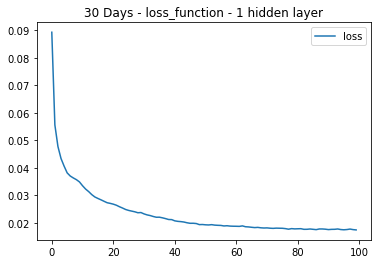

0.9829059404897076
0.9775628588908183


 Training and predicting - 45 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
2
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


740/740 [==============================] - 2s 2ms/step - loss: 0.4311 - mse: 0.4311
Epoch 2/100
740/740 [==============================] - 2s 2ms/step - loss: 0.1265 - mse: 0.1265
Epoch 3/100
740/740 [==============================] - 2s 2ms/step - loss: 0.1200 - mse: 0.1200
Epoch 4/100
740/740 [==============================] - 2s 2ms/step - loss: 0.1145 - mse: 0.1145
Epoch 5/100
740/740 [==============================] - 2s 2ms/step - loss: 0.1075 - mse: 0.1075
Epoch 6/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0984 - mse: 0.0984
Epoch 7/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0919 - mse: 0.0919
Epoch 8/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0874 - mse: 0.0874
Epoch 9/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0840 - mse: 0.0840
Epoch 10/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0807 - mse: 0.0807
Epoch 11/100
740/740 [=============================

740/740 [==============================] - 2s 2ms/step - loss: 0.0539 - mse: 0.0539
Epoch 86/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0541 - mse: 0.0541
Epoch 87/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0541 - mse: 0.0541
Epoch 88/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0540 - mse: 0.0540
Epoch 89/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0541 - mse: 0.0541
Epoch 90/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0541 - mse: 0.0541
Epoch 91/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0540 - mse: 0.0540
Epoch 92/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0538 - mse: 0.0538
Epoch 93/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0538 - mse: 0.0538
Epoch 94/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0539 - mse: 0.0539
Epoch 95/100
740/740 [=====================

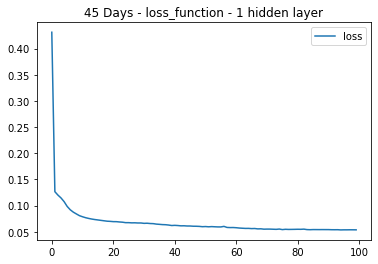

0.9459883215493716
0.943825144822338


 Training and predicting - 60 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
2
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_106 (Dense)            (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


668/668 [==============================] - 2s 3ms/step - loss: 0.7107 - mse: 0.7107
Epoch 2/100
668/668 [==============================] - 2s 2ms/step - loss: 0.2238 - mse: 0.2238
Epoch 3/100
668/668 [==============================] - 1s 2ms/step - loss: 0.2078 - mse: 0.2078
Epoch 4/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1992 - mse: 0.1992
Epoch 5/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1922 - mse: 0.1922
Epoch 6/100
668/668 [==============================] - 2s 2ms/step - loss: 0.1833 - mse: 0.1833
Epoch 7/100
668/668 [==============================] - 2s 2ms/step - loss: 0.1743 - mse: 0.1743
Epoch 8/100
668/668 [==============================] - 2s 2ms/step - loss: 0.1656 - mse: 0.1656
Epoch 9/100
668/668 [==============================] - 2s 3ms/step - loss: 0.1588 - mse: 0.1588
Epoch 10/100
668/668 [==============================] - 2s 2ms/step - loss: 0.1537 - mse: 0.1537
Epoch 11/100
668/668 [=============================

668/668 [==============================] - 2s 3ms/step - loss: 0.0789 - mse: 0.0789
Epoch 86/100
668/668 [==============================] - 2s 2ms/step - loss: 0.0792 - mse: 0.0792
Epoch 87/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0788 - mse: 0.0788
Epoch 88/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0787 - mse: 0.0787
Epoch 89/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0789 - mse: 0.0789
Epoch 90/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0785 - mse: 0.0785
Epoch 91/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0782 - mse: 0.0782
Epoch 92/100
668/668 [==============================] - 2s 2ms/step - loss: 0.0779 - mse: 0.0779
Epoch 93/100
668/668 [==============================] - 2s 2ms/step - loss: 0.0779 - mse: 0.0779
Epoch 94/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0780 - mse: 0.0780
Epoch 95/100
668/668 [=====================

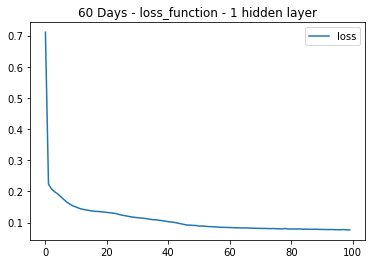

0.9237405824170442
0.9255199854973388


 Training and predicting - 75 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
2
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_108 (Dense)            (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


595/595 [==============================] - 1s 2ms/step - loss: 0.3951 - mse: 0.3951
Epoch 2/100
595/595 [==============================] - 1s 2ms/step - loss: 0.3102 - mse: 0.3102
Epoch 3/100
595/595 [==============================] - 1s 2ms/step - loss: 0.2860 - mse: 0.2860
Epoch 4/100
595/595 [==============================] - 1s 2ms/step - loss: 0.2685 - mse: 0.2685
Epoch 5/100
595/595 [==============================] - 1s 2ms/step - loss: 0.2553 - mse: 0.2553
Epoch 6/100
595/595 [==============================] - 1s 2ms/step - loss: 0.2423 - mse: 0.2423
Epoch 7/100
595/595 [==============================] - 1s 2ms/step - loss: 0.2322 - mse: 0.2322
Epoch 8/100
595/595 [==============================] - 1s 2ms/step - loss: 0.2237 - mse: 0.2237
Epoch 9/100
595/595 [==============================] - 1s 2ms/step - loss: 0.2130 - mse: 0.2130
Epoch 10/100
595/595 [==============================] - 1s 2ms/step - loss: 0.2047 - mse: 0.2047
Epoch 11/100
595/595 [=============================

595/595 [==============================] - 1s 2ms/step - loss: 0.1239 - mse: 0.1239
Epoch 86/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1239 - mse: 0.1239
Epoch 87/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1236 - mse: 0.1236
Epoch 88/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1235 - mse: 0.1235
Epoch 89/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1232 - mse: 0.1232
Epoch 90/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1241 - mse: 0.1241
Epoch 91/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1227 - mse: 0.1227
Epoch 92/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1226 - mse: 0.1226
Epoch 93/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1225 - mse: 0.1225
Epoch 94/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1221 - mse: 0.1221
Epoch 95/100
595/595 [=====================

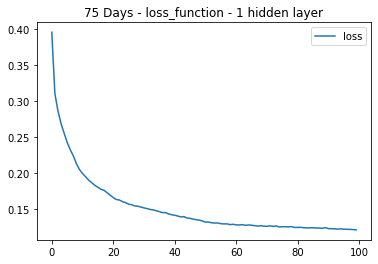

0.8808964868193556
0.8860621574629884


In [97]:
layers = { "number_input_features": 6,
      "n_layers": 2, 
      "l0":{"number_hidden_nodes":12,"activation_function":"relu"},
      "l1":{"number_hidden_nodes":1,"activation_function":"linear"}
     }


train_test(test_size=0.05,target="deaths",**layers)

## Predicting Number of New Deaths- with NN Model


# Deep Neural Network



 Training and predicting - 30 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
3
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 18)                126       
_________________________________________________________________
dense_110 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 10        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Epoch 1/100
813/813 [==============================] - 3s 3ms/step - loss: 0.1902 - mse: 0.1902
Epoch 2/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0428 - mse: 0.0428
Epoch 3/100
813/813 [==============================] - 3s 4ms/step - loss: 0.0345 - mse: 0.0345
Epoch 4/100
813/813 [==============================] - 3s 4ms/step - loss: 0.0285 - mse: 0.0285
Epoch 5/100
813/813 [==============================] - 4s 5ms/step - loss: 0.0246 - mse: 0.0246
Epoch 6/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0217 - mse: 0.0217
Epoch 7/100
813/813 [==============================] - 3s 4ms/step - loss: 0.0203 - mse: 0.0203
Epoch 8/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0185 - mse: 0.0185
Epoch 9/100
813/813 [==============================] - 3s 4ms/step - loss: 0.0170 - mse: 0.0170
Epoch 10/100
813/813 [==============================] - 4s 5ms/step - loss: 0.0157 - mse: 0.0157
Epoch 11/100
813/813 [=================

813/813 [==============================] - 2s 3ms/step - loss: 0.0039 - mse: 0.0039
Epoch 86/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0036 - mse: 0.0036
Epoch 87/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0035 - mse: 0.0035
Epoch 88/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0037 - mse: 0.0037
Epoch 89/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0036 - mse: 0.0036
Epoch 90/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0037 - mse: 0.0037
Epoch 91/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0037 - mse: 0.0037
Epoch 92/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0033 - mse: 0.0033
Epoch 93/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0033 - mse: 0.0033
Epoch 94/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0035 - mse: 0.0035
Epoch 95/100
813/813 [=====================

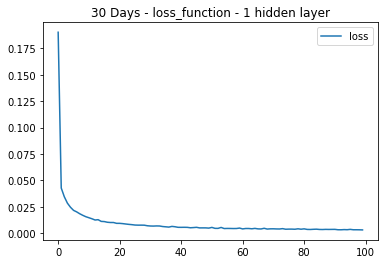

0.9970408273363334
0.9964944639218095


 Training and predicting - 45 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
3
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 18)                126       
_________________________________________________________________
dense_113 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_114 (Dense)            (None, 1)                 10        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


740/740 [==============================] - 2s 3ms/step - loss: 0.1798 - mse: 0.1798
Epoch 2/100
740/740 [==============================] - 2s 3ms/step - loss: 0.1013 - mse: 0.1013
Epoch 3/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0909 - mse: 0.0909
Epoch 4/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0832 - mse: 0.0832
Epoch 5/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0764 - mse: 0.0764
Epoch 6/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0700 - mse: 0.0700
Epoch 7/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0649 - mse: 0.0649
Epoch 8/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0597 - mse: 0.0597
Epoch 9/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0557 - mse: 0.0557
Epoch 10/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0509 - mse: 0.0509
Epoch 11/100
740/740 [=============================

740/740 [==============================] - 2s 3ms/step - loss: 0.0172 - mse: 0.0172
Epoch 86/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0182 - mse: 0.0182
Epoch 87/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0172 - mse: 0.0172
Epoch 88/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0180 - mse: 0.0180
Epoch 89/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0179 - mse: 0.0179
Epoch 90/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0180 - mse: 0.0180
Epoch 91/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0189 - mse: 0.0189
Epoch 92/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0167 - mse: 0.0167
Epoch 93/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0168 - mse: 0.0168
Epoch 94/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0177 - mse: 0.0177
Epoch 95/100
740/740 [=====================

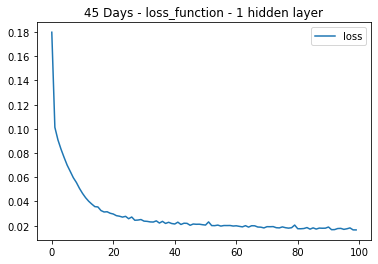

0.9830714781412515
0.9868986229073138


 Training and predicting - 60 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
3
Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 18)                126       
_________________________________________________________________
dense_116 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_117 (Dense)            (None, 1)                 10        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


668/668 [==============================] - 2s 3ms/step - loss: 0.3382 - mse: 0.3382
Epoch 2/100
668/668 [==============================] - 2s 3ms/step - loss: 0.1660 - mse: 0.1660
Epoch 3/100
668/668 [==============================] - 2s 3ms/step - loss: 0.1390 - mse: 0.1390
Epoch 4/100
668/668 [==============================] - 2s 4ms/step - loss: 0.1193 - mse: 0.1193
Epoch 5/100
668/668 [==============================] - 2s 4ms/step - loss: 0.1058 - mse: 0.1058
Epoch 6/100
668/668 [==============================] - 3s 4ms/step - loss: 0.0965 - mse: 0.0965
Epoch 7/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0917 - mse: 0.0917
Epoch 8/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0842 - mse: 0.0842
Epoch 9/100
668/668 [==============================] - 2s 2ms/step - loss: 0.0811 - mse: 0.0811
Epoch 10/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0768 - mse: 0.0768
Epoch 11/100
668/668 [=============================

668/668 [==============================] - 2s 3ms/step - loss: 0.0324 - mse: 0.0324
Epoch 86/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0329 - mse: 0.0329
Epoch 87/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0329 - mse: 0.0329
Epoch 88/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0347 - mse: 0.0347
Epoch 89/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0316 - mse: 0.0316
Epoch 90/100
668/668 [==============================] - 2s 2ms/step - loss: 0.0326 - mse: 0.0326
Epoch 91/100
668/668 [==============================] - 2s 2ms/step - loss: 0.0310 - mse: 0.0310
Epoch 92/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0317 - mse: 0.0317
Epoch 93/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0317 - mse: 0.0317
Epoch 94/100
668/668 [==============================] - 2s 2ms/step - loss: 0.0311 - mse: 0.0311
Epoch 95/100
668/668 [=====================

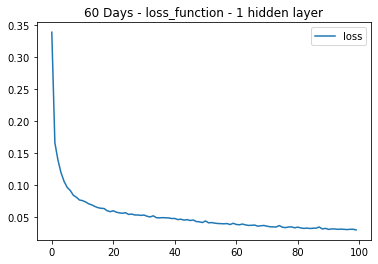

0.9667374887797564
0.9675242475431733


 Training and predicting - 75 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
3
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 18)                126       
_________________________________________________________________
dense_119 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_120 (Dense)            (None, 1)                 10        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


595/595 [==============================] - 2s 3ms/step - loss: 0.3249 - mse: 0.3249
Epoch 2/100
595/595 [==============================] - 2s 3ms/step - loss: 0.2603 - mse: 0.2603
Epoch 3/100
595/595 [==============================] - 2s 3ms/step - loss: 0.2182 - mse: 0.2182
Epoch 4/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1885 - mse: 0.1885
Epoch 5/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1655 - mse: 0.1655
Epoch 6/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1475 - mse: 0.1475
Epoch 7/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1358 - mse: 0.1358
Epoch 8/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1223 - mse: 0.1223
Epoch 9/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1145 - mse: 0.1145
Epoch 10/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1080 - mse: 0.1080
Epoch 11/100
595/595 [=============================

595/595 [==============================] - 2s 3ms/step - loss: 0.0448 - mse: 0.0448
Epoch 86/100
595/595 [==============================] - 2s 4ms/step - loss: 0.0448 - mse: 0.0448
Epoch 87/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0458 - mse: 0.0458
Epoch 88/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0442 - mse: 0.0442
Epoch 89/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0448 - mse: 0.0448
Epoch 90/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0443 - mse: 0.0443
Epoch 91/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0443 - mse: 0.0443
Epoch 92/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0436 - mse: 0.0436
Epoch 93/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0437 - mse: 0.0437
Epoch 94/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0436 - mse: 0.0436
Epoch 95/100
595/595 [=====================

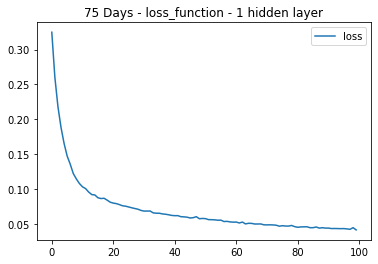

0.9585925997107044
0.9593534490551119


In [98]:
layers = { "number_input_features": 6,
      "n_layers": 3, 
      "l0":{"number_hidden_nodes":18,"activation_function":"relu"},
      "l1":{"number_hidden_nodes":9,"activation_function":"relu"},
      "l2":{"number_hidden_nodes":1,"activation_function":"linear"}
     }

train_test(test_size=0.05,target="deaths",**layers)



 Training and predicting - 30 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
4
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 18)                126       
_________________________________________________________________
dense_122 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_123 (Dense)            (None, 4)                 40        
_________________________________________________________________
dense_124 (Dense)            (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


813/813 [==============================] - 2s 3ms/step - loss: 0.2984 - mse: 0.2984
Epoch 2/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0375 - mse: 0.0375
Epoch 3/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0295 - mse: 0.0295
Epoch 4/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0244 - mse: 0.0244
Epoch 5/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0217 - mse: 0.0217
Epoch 6/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0195 - mse: 0.0195
Epoch 7/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0177 - mse: 0.0177
Epoch 8/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0165 - mse: 0.0165
Epoch 9/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0150 - mse: 0.0150
Epoch 10/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0141 - mse: 0.0141
Epoch 11/100
813/813 [=============================

813/813 [==============================] - 3s 3ms/step - loss: 0.0032 - mse: 0.0032
Epoch 86/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0032 - mse: 0.0032
Epoch 87/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0034 - mse: 0.0034
Epoch 88/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0029 - mse: 0.0029
Epoch 89/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0032 - mse: 0.0032
Epoch 90/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0030 - mse: 0.0030
Epoch 91/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0029 - mse: 0.0029
Epoch 92/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0029 - mse: 0.0029
Epoch 93/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0029 - mse: 0.0029
Epoch 94/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0035 - mse: 0.0035
Epoch 95/100
813/813 [=====================

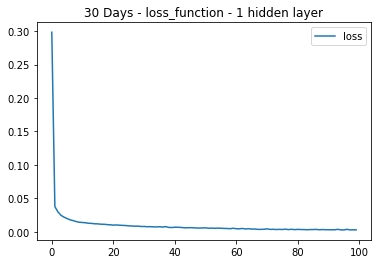

0.9974776411632192
0.9976936667848666


 Training and predicting - 45 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
4
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 18)                126       
_________________________________________________________________
dense_126 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_127 (Dense)            (None, 4)                 40        
_________________________________________________________________
dense_128 (Dense)            (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_______________________________________________________

/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


740/740 [==============================] - 3s 5ms/step - loss: 0.1666 - mse: 0.1666
Epoch 2/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0926 - mse: 0.0926
Epoch 3/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0783 - mse: 0.0783
Epoch 4/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0657 - mse: 0.0657A: 1s - los
Epoch 5/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0581 - mse: 0.0581
Epoch 6/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0520 - mse: 0.0520
Epoch 7/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0481 - mse: 0.0481
Epoch 8/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0436 - mse: 0.0436
Epoch 9/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0398 - mse: 0.0398
Epoch 10/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0393 - mse: 0.0393
Epoch 11/100
740/740 [==================

740/740 [==============================] - 2s 3ms/step - loss: 0.0096 - mse: 0.0096
Epoch 86/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0094 - mse: 0.0094
Epoch 87/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0089 - mse: 0.0089
Epoch 88/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0097 - mse: 0.0097
Epoch 89/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0098 - mse: 0.0098
Epoch 90/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0088 - mse: 0.0088
Epoch 91/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0089 - mse: 0.0089
Epoch 92/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0092 - mse: 0.0092
Epoch 93/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0098 - mse: 0.0098
Epoch 94/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0095 - mse: 0.0095
Epoch 95/100
740/740 [=====================

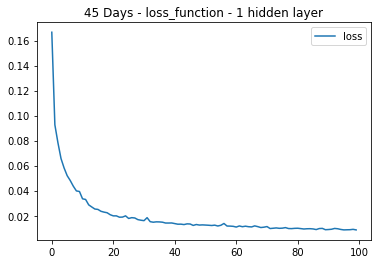

0.9923084632322402
0.9910359197462572


 Training and predicting - 60 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
4
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 18)                126       
_________________________________________________________________
dense_130 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_131 (Dense)            (None, 4)                 40        
_________________________________________________________________
dense_132 (Dense)            (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_______________________________________________________

/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Epoch 1/100
668/668 [==============================] - 2s 3ms/step - loss: 0.4692 - mse: 0.4692
Epoch 2/100
668/668 [==============================] - 2s 3ms/step - loss: 0.1531 - mse: 0.1531
Epoch 3/100
668/668 [==============================] - 2s 3ms/step - loss: 0.1249 - mse: 0.1249
Epoch 4/100
668/668 [==============================] - 2s 3ms/step - loss: 0.1098 - mse: 0.1098
Epoch 5/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0954 - mse: 0.0954
Epoch 6/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0813 - mse: 0.0813
Epoch 7/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0682 - mse: 0.0682
Epoch 8/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0611 - mse: 0.0611
Epoch 9/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0568 - mse: 0.0568
Epoch 10/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0534 - mse: 0.0534
Epoch 11/100
668/668 [=================

668/668 [==============================] - 2s 3ms/step - loss: 0.0245 - mse: 0.0245
Epoch 86/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0257 - mse: 0.0257
Epoch 87/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0246 - mse: 0.0246
Epoch 88/100
668/668 [==============================] - 2s 2ms/step - loss: 0.0259 - mse: 0.0259
Epoch 89/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0244 - mse: 0.0244
Epoch 90/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0249 - mse: 0.0249
Epoch 91/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0252 - mse: 0.0252
Epoch 92/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0251 - mse: 0.0251
Epoch 93/100
668/668 [==============================] - 2s 2ms/step - loss: 0.0235 - mse: 0.0235
Epoch 94/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0247 - mse: 0.0247
Epoch 95/100
668/668 [=====================

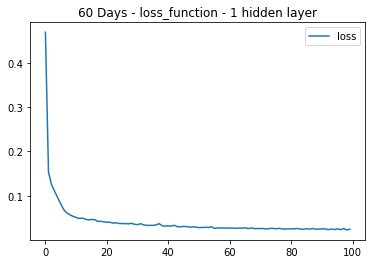

0.9762405119344665
0.9771542882288146


 Training and predicting - 75 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
4
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 18)                126       
_________________________________________________________________
dense_134 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_135 (Dense)            (None, 4)                 40        
_________________________________________________________________
dense_136 (Dense)            (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_______________________________________________________

/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


595/595 [==============================] - 2s 3ms/step - loss: 0.3308 - mse: 0.3308
Epoch 2/100
595/595 [==============================] - 2s 3ms/step - loss: 0.2470 - mse: 0.2470
Epoch 3/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1930 - mse: 0.1930
Epoch 4/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1530 - mse: 0.1530
Epoch 5/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1280 - mse: 0.1280
Epoch 6/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1093 - mse: 0.1093
Epoch 7/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1039 - mse: 0.1039
Epoch 8/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0862 - mse: 0.0862
Epoch 9/100
595/595 [==============================] - ETA: 0s - loss: 0.0812 - mse: 0.081 - 2s 3ms/step - loss: 0.0810 - mse: 0.0810
Epoch 10/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0707 - mse: 0.0707
Epoch 11/100


595/595 [==============================] - 2s 3ms/step - loss: 0.0160 - mse: 0.0160
Epoch 86/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0180 - mse: 0.0180
Epoch 87/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0165 - mse: 0.0165
Epoch 88/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0163 - mse: 0.0163
Epoch 89/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0158 - mse: 0.0158
Epoch 90/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0169 - mse: 0.0169
Epoch 91/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0166 - mse: 0.0166
Epoch 92/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0164 - mse: 0.0164
Epoch 93/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0161 - mse: 0.0161
Epoch 94/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0175 - mse: 0.0175
Epoch 95/100
595/595 [=====================

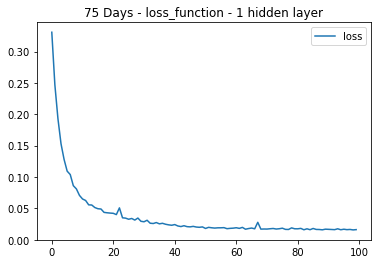

0.98449967407651
0.9889790880483729


In [99]:
layers = { "number_input_features": 6,
      "n_layers": 4, 
      "l0":{"number_hidden_nodes":18,"activation_function":"relu"},
      "l1":{"number_hidden_nodes":9,"activation_function":"relu"},
      "l2":{"number_hidden_nodes":4,"activation_function":"relu"},
      "l3":{"number_hidden_nodes":1,"activation_function":"linear"}
          
     }

train_test(test_size=0.05,target="deaths",**layers)

## Cases



 Training and predicting - 30 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
2
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_137 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_138 (Dense)            (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


813/813 [==============================] - 2s 3ms/step - loss: 0.7196 - mse: 0.7196
Epoch 2/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0985 - mse: 0.0985
Epoch 3/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0505 - mse: 0.0505
Epoch 4/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0344 - mse: 0.0344
Epoch 5/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0273 - mse: 0.0273
Epoch 6/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0237 - mse: 0.0237
Epoch 7/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0223 - mse: 0.0223
Epoch 8/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0214 - mse: 0.0214
Epoch 9/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0205 - mse: 0.0205
Epoch 10/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0200 - mse: 0.0200
Epoch 11/100
813/813 [=============================

813/813 [==============================] - 2s 2ms/step - loss: 0.0066 - mse: 0.0066
Epoch 86/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0069 - mse: 0.0069
Epoch 87/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0067 - mse: 0.0067
Epoch 88/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0066 - mse: 0.0066
Epoch 89/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0066 - mse: 0.0066
Epoch 90/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0066 - mse: 0.0066
Epoch 91/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0067 - mse: 0.0067
Epoch 92/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0070 - mse: 0.0070
Epoch 93/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0065 - mse: 0.0065
Epoch 94/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0067 - mse: 0.0067
Epoch 95/100
813/813 [=====================

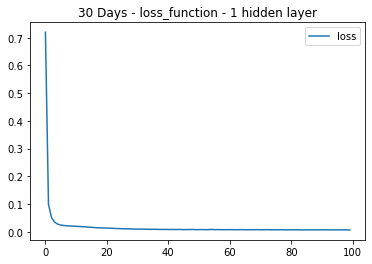

0.9937701244928582
0.988187171039576


 Training and predicting - 45 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
2
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_140 (Dense)            (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


740/740 [==============================] - 1s 2ms/step - loss: 0.5650 - mse: 0.5650
Epoch 2/100
740/740 [==============================] - 1s 2ms/step - loss: 0.1143 - mse: 0.1143
Epoch 3/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0696 - mse: 0.0696
Epoch 4/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0567 - mse: 0.0567
Epoch 5/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0513 - mse: 0.0513
Epoch 6/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0492 - mse: 0.0492
Epoch 7/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0465 - mse: 0.0465
Epoch 8/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0440 - mse: 0.0440
Epoch 9/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0419 - mse: 0.0419
Epoch 10/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0409 - mse: 0.0409
Epoch 11/100
740/740 [=============================

740/740 [==============================] - 1s 2ms/step - loss: 0.0202 - mse: 0.0202
Epoch 86/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0204 - mse: 0.0204
Epoch 87/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0203 - mse: 0.0203
Epoch 88/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0199 - mse: 0.0199
Epoch 89/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0199 - mse: 0.0199
Epoch 90/100
740/740 [==============================] - 1s 2ms/step - loss: 0.0196 - mse: 0.0196
Epoch 91/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0199 - mse: 0.0199
Epoch 92/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0196 - mse: 0.0196
Epoch 93/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0197 - mse: 0.0197
Epoch 94/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0197 - mse: 0.0197
Epoch 95/100
740/740 [=====================

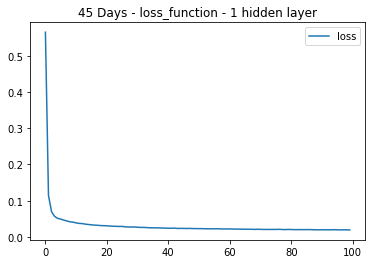

0.9802150896339881
0.9895666993973198


 Training and predicting - 60 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
2
Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_142 (Dense)            (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


668/668 [==============================] - 2s 3ms/step - loss: 0.4324 - mse: 0.4324
Epoch 2/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1351 - mse: 0.1351
Epoch 3/100
668/668 [==============================] - 1s 2ms/step - loss: 0.1166 - mse: 0.1166
Epoch 4/100
668/668 [==============================] - 2s 2ms/step - loss: 0.1060 - mse: 0.1060
Epoch 5/100
668/668 [==============================] - 2s 2ms/step - loss: 0.0979 - mse: 0.0979
Epoch 6/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0899 - mse: 0.0899
Epoch 7/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0832 - mse: 0.0832
Epoch 8/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0777 - mse: 0.0777
Epoch 9/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0724 - mse: 0.0724
Epoch 10/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0675 - mse: 0.0675
Epoch 11/100
668/668 [=============================

668/668 [==============================] - 1s 2ms/step - loss: 0.0238 - mse: 0.0238
Epoch 86/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0238 - mse: 0.0238
Epoch 87/100
668/668 [==============================] - 3s 4ms/step - loss: 0.0245 - mse: 0.0245
Epoch 88/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0237 - mse: 0.0237
Epoch 89/100
668/668 [==============================] - 2s 2ms/step - loss: 0.0237 - mse: 0.0237
Epoch 90/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0236 - mse: 0.0236
Epoch 91/100
668/668 [==============================] - 2s 4ms/step - loss: 0.0238 - mse: 0.0238
Epoch 92/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0236 - mse: 0.0236
Epoch 93/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0238 - mse: 0.0238
Epoch 94/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0234 - mse: 0.0234
Epoch 95/100
668/668 [=====================

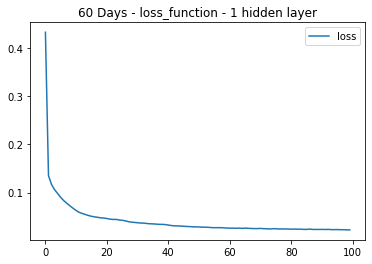

0.9776146431124675
0.9786382103939765


 Training and predicting - 75 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
2
Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_143 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_144 (Dense)            (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


595/595 [==============================] - 2s 3ms/step - loss: 0.3731 - mse: 0.3731
Epoch 2/100
595/595 [==============================] - 2s 3ms/step - loss: 0.2144 - mse: 0.2144
Epoch 3/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1887 - mse: 0.1887
Epoch 4/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1776 - mse: 0.1776
Epoch 5/100
595/595 [==============================] - 1s 2ms/step - loss: 0.1698 - mse: 0.1698
Epoch 6/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1625 - mse: 0.1625
Epoch 7/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1546 - mse: 0.1546
Epoch 8/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1446 - mse: 0.1446
Epoch 9/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1363 - mse: 0.1363
Epoch 10/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1299 - mse: 0.1299
Epoch 11/100
595/595 [=============================

Epoch 85/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0441 - mse: 0.0441
Epoch 86/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0441 - mse: 0.0441
Epoch 87/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0439 - mse: 0.0439
Epoch 88/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0434 - mse: 0.0434
Epoch 89/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0431 - mse: 0.0431
Epoch 90/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0430 - mse: 0.0430
Epoch 91/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0430 - mse: 0.0430
Epoch 92/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0426 - mse: 0.0426
Epoch 93/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0426 - mse: 0.0426
Epoch 94/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0425 - mse: 0.0425
Epoch 95/100
595/595 [========

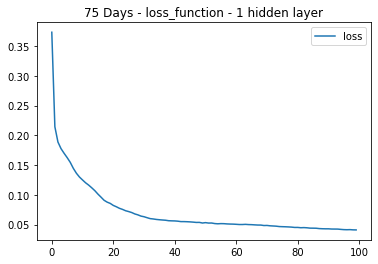

0.9586451296413037
0.9512361041868043


In [100]:
layers = { "number_input_features": 6,
      "n_layers": 2, 
      "l0":{"number_hidden_nodes":12,"activation_function":"relu"},
      "l1":{"number_hidden_nodes":1,"activation_function":"linear"}
     }


train_test(test_size=0.05,target="cases",**layers)



 Training and predicting - 30 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
3
Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 18)                126       
_________________________________________________________________
dense_146 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_147 (Dense)            (None, 1)                 10        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


813/813 [==============================] - 3s 3ms/step - loss: 0.2125 - mse: 0.2125
Epoch 2/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0242 - mse: 0.0242
Epoch 3/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0194 - mse: 0.0194
Epoch 4/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0187 - mse: 0.0187
Epoch 5/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0172 - mse: 0.0172
Epoch 6/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0152 - mse: 0.0152
Epoch 7/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0146 - mse: 0.0146
Epoch 8/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0133 - mse: 0.0133
Epoch 9/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0125 - mse: 0.0125
Epoch 10/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0130 - mse: 0.0130
Epoch 11/100
813/813 [=============================

813/813 [==============================] - 2s 3ms/step - loss: 0.0038 - mse: 0.0038
Epoch 86/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0037 - mse: 0.0037
Epoch 87/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0037 - mse: 0.0037
Epoch 88/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0035 - mse: 0.0035
Epoch 89/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0034 - mse: 0.0034
Epoch 90/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0035 - mse: 0.0035
Epoch 91/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0034 - mse: 0.0034
Epoch 92/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0040 - mse: 0.0040
Epoch 93/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0034 - mse: 0.0034
Epoch 94/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0033 - mse: 0.0033
Epoch 95/100
813/813 [=====================

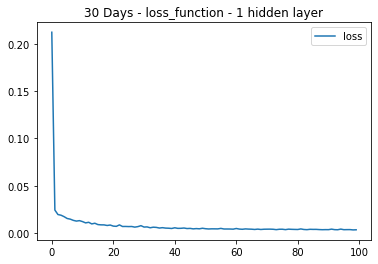

0.9972364539015621
0.9973522543881425


 Training and predicting - 45 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
3
Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (None, 18)                126       
_________________________________________________________________
dense_149 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_150 (Dense)            (None, 1)                 10        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


740/740 [==============================] - 2s 2ms/step - loss: 0.7652 - mse: 0.7652
Epoch 2/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0572 - mse: 0.0572
Epoch 3/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0432 - mse: 0.0432
Epoch 4/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0364 - mse: 0.0364
Epoch 5/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0317 - mse: 0.0317
Epoch 6/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0302 - mse: 0.0302
Epoch 7/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0269 - mse: 0.0269
Epoch 8/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0251 - mse: 0.0251
Epoch 9/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0234 - mse: 0.0234
Epoch 10/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0222 - mse: 0.0222
Epoch 11/100
740/740 [=============================

740/740 [==============================] - 2s 3ms/step - loss: 0.0073 - mse: 0.0073
Epoch 86/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0068 - mse: 0.0068
Epoch 87/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0074 - mse: 0.0074
Epoch 88/100
740/740 [==============================] - 2s 2ms/step - loss: 0.0068 - mse: 0.0068
Epoch 89/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0072 - mse: 0.0072
Epoch 90/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0069 - mse: 0.0069
Epoch 91/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0073 - mse: 0.0073
Epoch 92/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0067 - mse: 0.0067
Epoch 93/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0071 - mse: 0.0071
Epoch 94/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0069 - mse: 0.0069
Epoch 95/100
740/740 [=====================

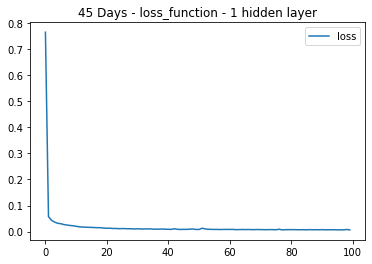

0.994085779769492
0.9960761339824247


 Training and predicting - 60 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
3
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_151 (Dense)            (None, 18)                126       
_________________________________________________________________
dense_152 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_153 (Dense)            (None, 1)                 10        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


668/668 [==============================] - 2s 3ms/step - loss: 0.2176 - mse: 0.2176
Epoch 2/100
668/668 [==============================] - 2s 2ms/step - loss: 0.0939 - mse: 0.0939
Epoch 3/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0676 - mse: 0.0676
Epoch 4/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0531 - mse: 0.0531
Epoch 5/100
668/668 [==============================] - 2s 2ms/step - loss: 0.0460 - mse: 0.0460
Epoch 6/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0405 - mse: 0.0405
Epoch 7/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0390 - mse: 0.0390
Epoch 8/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0370 - mse: 0.0370
Epoch 9/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0348 - mse: 0.0348
Epoch 10/100
668/668 [==============================] - 2s 2ms/step - loss: 0.0333 - mse: 0.0333
Epoch 11/100
668/668 [=============================

668/668 [==============================] - 2s 3ms/step - loss: 0.0113 - mse: 0.0113
Epoch 86/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0110 - mse: 0.0110
Epoch 87/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0114 - mse: 0.0114
Epoch 88/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0106 - mse: 0.0106
Epoch 89/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0116 - mse: 0.0116
Epoch 90/100
668/668 [==============================] - 1s 2ms/step - loss: 0.0107 - mse: 0.0107
Epoch 91/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0110 - mse: 0.0110
Epoch 92/100
668/668 [==============================] - 2s 2ms/step - loss: 0.0112 - mse: 0.0112
Epoch 93/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0105 - mse: 0.0105
Epoch 94/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0114 - mse: 0.0114
Epoch 95/100
668/668 [=====================

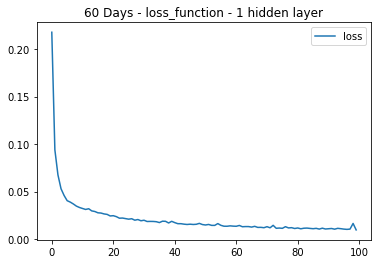

0.9899142251361435
0.9936938796494701


 Training and predicting - 75 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
3
Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 18)                126       
_________________________________________________________________
dense_155 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_156 (Dense)            (None, 1)                 10        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


595/595 [==============================] - 2s 3ms/step - loss: 0.2798 - mse: 0.2798
Epoch 2/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1543 - mse: 0.1543
Epoch 3/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1186 - mse: 0.1186
Epoch 4/100
595/595 [==============================] - 1s 3ms/step - loss: 0.0847 - mse: 0.0847
Epoch 5/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0637 - mse: 0.0637
Epoch 6/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0480 - mse: 0.0480
Epoch 7/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0400 - mse: 0.0400
Epoch 8/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0362 - mse: 0.0362
Epoch 9/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0323 - mse: 0.0323
Epoch 10/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0297 - mse: 0.0297
Epoch 11/100
595/595 [=============================

595/595 [==============================] - 2s 3ms/step - loss: 0.0097 - mse: 0.0097
Epoch 86/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0097 - mse: 0.0097
Epoch 87/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0103 - mse: 0.0103
Epoch 88/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0109 - mse: 0.0109
Epoch 89/100
595/595 [==============================] - 2s 4ms/step - loss: 0.0104 - mse: 0.0104
Epoch 90/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0107 - mse: 0.0107
Epoch 91/100
595/595 [==============================] - 1s 2ms/step - loss: 0.0094 - mse: 0.0094
Epoch 92/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0103 - mse: 0.0103
Epoch 93/100
595/595 [==============================] - 2s 4ms/step - loss: 0.0095 - mse: 0.0095
Epoch 94/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0097 - mse: 0.0097
Epoch 95/100
595/595 [=====================

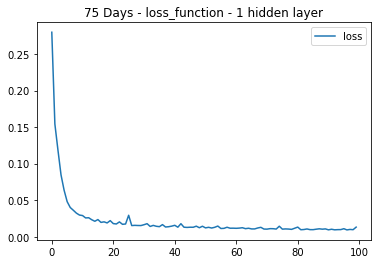

0.9912504089346861
0.9802470497801302


In [101]:
layers = { "number_input_features": 6,
      "n_layers": 3, 
      "l0":{"number_hidden_nodes":18,"activation_function":"relu"},
      "l1":{"number_hidden_nodes":9,"activation_function":"relu"},
      "l2":{"number_hidden_nodes":1,"activation_function":"linear"}
     }

train_test(test_size=0.05,target="cases",**layers)



 Training and predicting - 30 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
4
Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 18)                126       
_________________________________________________________________
dense_158 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_159 (Dense)            (None, 4)                 40        
_________________________________________________________________
dense_160 (Dense)            (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


813/813 [==============================] - 2s 3ms/step - loss: 0.2826 - mse: 0.2826
Epoch 2/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0247 - mse: 0.0247
Epoch 3/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0190 - mse: 0.0190
Epoch 4/100
813/813 [==============================] - 2s 2ms/step - loss: 0.0170 - mse: 0.0170
Epoch 5/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0136 - mse: 0.0136
Epoch 6/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0129 - mse: 0.0129
Epoch 7/100
813/813 [==============================] - 3s 3ms/step - loss: 0.0115 - mse: 0.0115
Epoch 8/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0096 - mse: 0.0096
Epoch 9/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0099 - mse: 0.0099
Epoch 10/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0083 - mse: 0.0083
Epoch 11/100
813/813 [=============================

813/813 [==============================] - 2s 3ms/step - loss: 0.0035 - mse: 0.0035
Epoch 86/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0035 - mse: 0.0035
Epoch 87/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0030 - mse: 0.0030
Epoch 88/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0042 - mse: 0.0042
Epoch 89/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0029 - mse: 0.0029
Epoch 90/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0032 - mse: 0.0032
Epoch 91/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0035 - mse: 0.0035
Epoch 92/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0035 - mse: 0.0035
Epoch 93/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0029 - mse: 0.0029
Epoch 94/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0032 - mse: 0.0032
Epoch 95/100
813/813 [=====================

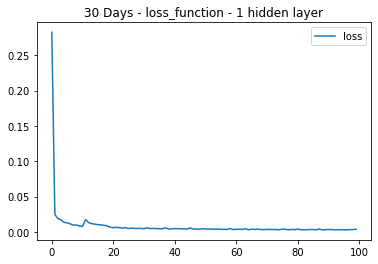

0.9956769270527732
0.995215435600594


 Training and predicting - 45 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
4
Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_161 (Dense)            (None, 18)                126       
_________________________________________________________________
dense_162 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_163 (Dense)            (None, 4)                 40        
_________________________________________________________________
dense_164 (Dense)            (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
________________________________________________________

/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


740/740 [==============================] - 2s 3ms/step - loss: 0.5323 - mse: 0.5323
Epoch 2/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0450 - mse: 0.0450
Epoch 3/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0382 - mse: 0.0382
Epoch 4/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0363 - mse: 0.0363
Epoch 5/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0331 - mse: 0.0331
Epoch 6/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0320 - mse: 0.0320
Epoch 7/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0292 - mse: 0.0292
Epoch 8/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0274 - mse: 0.0274
Epoch 9/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0259 - mse: 0.0259
Epoch 10/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0246 - mse: 0.0246
Epoch 11/100
740/740 [=============================

740/740 [==============================] - 2s 3ms/step - loss: 0.0052 - mse: 0.0052
Epoch 86/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0064 - mse: 0.0064
Epoch 87/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0049 - mse: 0.0049
Epoch 88/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0050 - mse: 0.0050
Epoch 89/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0059 - mse: 0.0059
Epoch 90/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0045 - mse: 0.0045
Epoch 91/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0068 - mse: 0.0068
Epoch 92/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0045 - mse: 0.0045
Epoch 93/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0054 - mse: 0.0054
Epoch 94/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0046 - mse: 0.0046
Epoch 95/100
740/740 [=====================

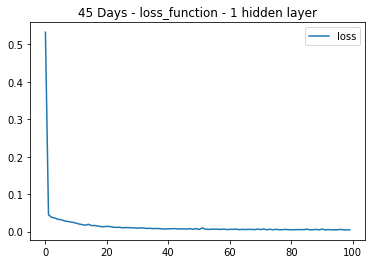

0.9954062660054516
0.994959726797862


 Training and predicting - 60 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
4
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 18)                126       
_________________________________________________________________
dense_166 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_167 (Dense)            (None, 4)                 40        
_________________________________________________________________
dense_168 (Dense)            (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
________________________________________________________

/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


668/668 [==============================] - 2s 3ms/step - loss: 0.3602 - mse: 0.3602
Epoch 2/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0809 - mse: 0.0809
Epoch 3/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0598 - mse: 0.0598
Epoch 4/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0481 - mse: 0.0481
Epoch 5/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0427 - mse: 0.0427
Epoch 6/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0391 - mse: 0.0391
Epoch 7/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0364 - mse: 0.0364
Epoch 8/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0323 - mse: 0.0323
Epoch 9/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0261 - mse: 0.0261
Epoch 10/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0222 - mse: 0.0222
Epoch 11/100
668/668 [=============================

668/668 [==============================] - 2s 3ms/step - loss: 0.0074 - mse: 0.0074
Epoch 86/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0071 - mse: 0.0071
Epoch 87/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0074 - mse: 0.0074
Epoch 88/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0069 - mse: 0.0069
Epoch 89/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0081 - mse: 0.0081
Epoch 90/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0060 - mse: 0.0060
Epoch 91/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0060 - mse: 0.0060
Epoch 92/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0079 - mse: 0.0079
Epoch 93/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0078 - mse: 0.0078
Epoch 94/100
668/668 [==============================] - 2s 3ms/step - loss: 0.0057 - mse: 0.0057
Epoch 95/100
668/668 [=====================

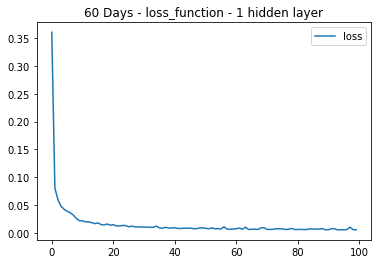

0.9948005584782892
0.9956644360412849


 Training and predicting - 75 days ahead


X COLUMNS: Index(['population', 'population_density', 'median_age',
       'StringencyIndex_updated', 'total_cases_updated',
       'total_deaths_updated'],
      dtype='object')
4
Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 18)                126       
_________________________________________________________________
dense_170 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_171 (Dense)            (None, 4)                 40        
_________________________________________________________________
dense_172 (Dense)            (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_______________________________________________________

/home/sami/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


595/595 [==============================] - 2s 3ms/step - loss: 0.3761 - mse: 0.3761
Epoch 2/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1571 - mse: 0.1571
Epoch 3/100
595/595 [==============================] - 2s 3ms/step - loss: 0.1258 - mse: 0.1258
Epoch 4/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0950 - mse: 0.0950
Epoch 5/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0726 - mse: 0.0726
Epoch 6/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0562 - mse: 0.0562
Epoch 7/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0461 - mse: 0.0461
Epoch 8/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0360 - mse: 0.0360
Epoch 9/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0325 - mse: 0.0325
Epoch 10/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0304 - mse: 0.0304
Epoch 11/100
595/595 [=============================

595/595 [==============================] - 2s 3ms/step - loss: 0.0088 - mse: 0.0088
Epoch 86/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0122 - mse: 0.0122
Epoch 87/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0082 - mse: 0.0082
Epoch 88/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0081 - mse: 0.0081
Epoch 89/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0092 - mse: 0.0092
Epoch 90/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0082 - mse: 0.0082
Epoch 91/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0131 - mse: 0.0131
Epoch 92/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0088 - mse: 0.0088
Epoch 93/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0084 - mse: 0.0084
Epoch 94/100
595/595 [==============================] - 2s 3ms/step - loss: 0.0080 - mse: 0.0080
Epoch 95/100
595/595 [=====================

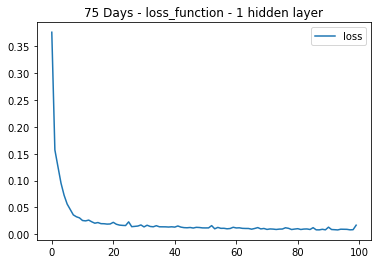

0.9923638397142451
0.9958642150469337


In [102]:
layers = { "number_input_features": 6,
      "n_layers": 4, 
      "l0":{"number_hidden_nodes":18,"activation_function":"relu"},
      "l1":{"number_hidden_nodes":9,"activation_function":"relu"},
      "l2":{"number_hidden_nodes":4,"activation_function":"relu"},
      "l3":{"number_hidden_nodes":1,"activation_function":"linear"}
          
     }

train_test(test_size=0.05,target="cases",**layers)

In [103]:
final_df.to_csv("final_df.csv")